In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#시각화 시 한글 폰트설정

In [29]:
cancer = pd.read_csv('data/cancer1.csv', sep=",",encoding='cp949')
#csv파일 불러오기

In [30]:
cancer

,발생기간,성,국제질병분류코드(ICD-10),암종,환자수(명),5년 암상대생존율(%)
0,1993-1995년,남녀전체,C00-C96,모든암,169365,41.2
1,1993-1995년,남녀전체,C00-C14,"입술, 구강 및 인두",3400,41.1
2,1993-1995년,남녀전체,C15,식도,3412,12.7
3,1993-1995년,남녀전체,C16,위,38593,42.8
4,1993-1995년,남녀전체,C18-C20,대장,13467,54.8
...,...,...,...,...,...,...
415,2012-2016년,여자,C81,호지킨림프종,471,85.0
416,2012-2016년,여자,"C82-C86,C96",비호지킨 림프종,8101,63.0
417,2012-2016년,여자,C90,다발성 골수종,2976,43.6
418,2012-2016년,여자,C91-C95,백혈병,5974,51.1


In [31]:
cancer.columns
#칼럼명 확인

Index(['발생기간', '성', ' 국제질병분류코드(ICD-10)', '암종', '환자수(명)', ' 5년 암상대생존율(%)'], dtype='object')

In [32]:
cancer = cancer[cancer['암종']!='모든암']
cancer = cancer[cancer['암종']!='기타 암']
#분석을 위해 필요없는 데이터 제거

In [33]:
cancer

,발생기간,성,국제질병분류코드(ICD-10),암종,환자수(명),5년 암상대생존율(%)
1,1993-1995년,남녀전체,C00-C14,"입술, 구강 및 인두",3400,41.1
2,1993-1995년,남녀전체,C15,식도,3412,12.7
3,1993-1995년,남녀전체,C16,위,38593,42.8
4,1993-1995년,남녀전체,C18-C20,대장,13467,54.8
5,1993-1995년,남녀전체,C22,간,20236,10.7
...,...,...,...,...,...,...
414,2012-2016년,여자,C73,갑상선,130335,100.1
415,2012-2016년,여자,C81,호지킨림프종,471,85.0
416,2012-2016년,여자,"C82-C86,C96",비호지킨 림프종,8101,63.0
417,2012-2016년,여자,C90,다발성 골수종,2976,43.6


In [34]:
cancer.rename(columns={" 5년 암상대생존율(%)":"5년 암상대생존율"}, inplace=True)
cancer.rename(columns={"환자수(명)":"환자수"}, inplace=True)
#칼럼명 변경

In [35]:
cancer['발생기간'].value_counts()

2011-2015년    64
1996-2000년    64
2006-2010년    64
1993-1995년    64
2012-2016년    64
2001-2005년    64
Name: 발생기간, dtype: int64

In [36]:
cancer1993 = cancer[cancer['발생기간']=='1993-1995년']
cancer2012 = cancer[cancer['발생기간']=='2012-2016년']
#특정 발생기간 데이터만 재분류

In [37]:
cancer1993

,발생기간,성,국제질병분류코드(ICD-10),암종,환자수,5년 암상대생존율
1,1993-1995년,남녀전체,C00-C14,"입술, 구강 및 인두",3400,41.1
2,1993-1995년,남녀전체,C15,식도,3412,12.7
3,1993-1995년,남녀전체,C16,위,38593,42.8
4,1993-1995년,남녀전체,C18-C20,대장,13467,54.8
5,1993-1995년,남녀전체,C22,간,20236,10.7
...,...,...,...,...,...,...
64,1993-1995년,여자,C73,갑상선,4097,95.4
65,1993-1995년,여자,C81,호지킨림프종,96,68.6
66,1993-1995년,여자,"C82-C86,C96",비호지킨 림프종,1342,48.7
67,1993-1995년,여자,C90,다발성 골수종,290,23.3


In [38]:
man1993 = cancer1993[cancer1993['성']=='남자']
woman1993= cancer1993[cancer1993['성']=='여자']

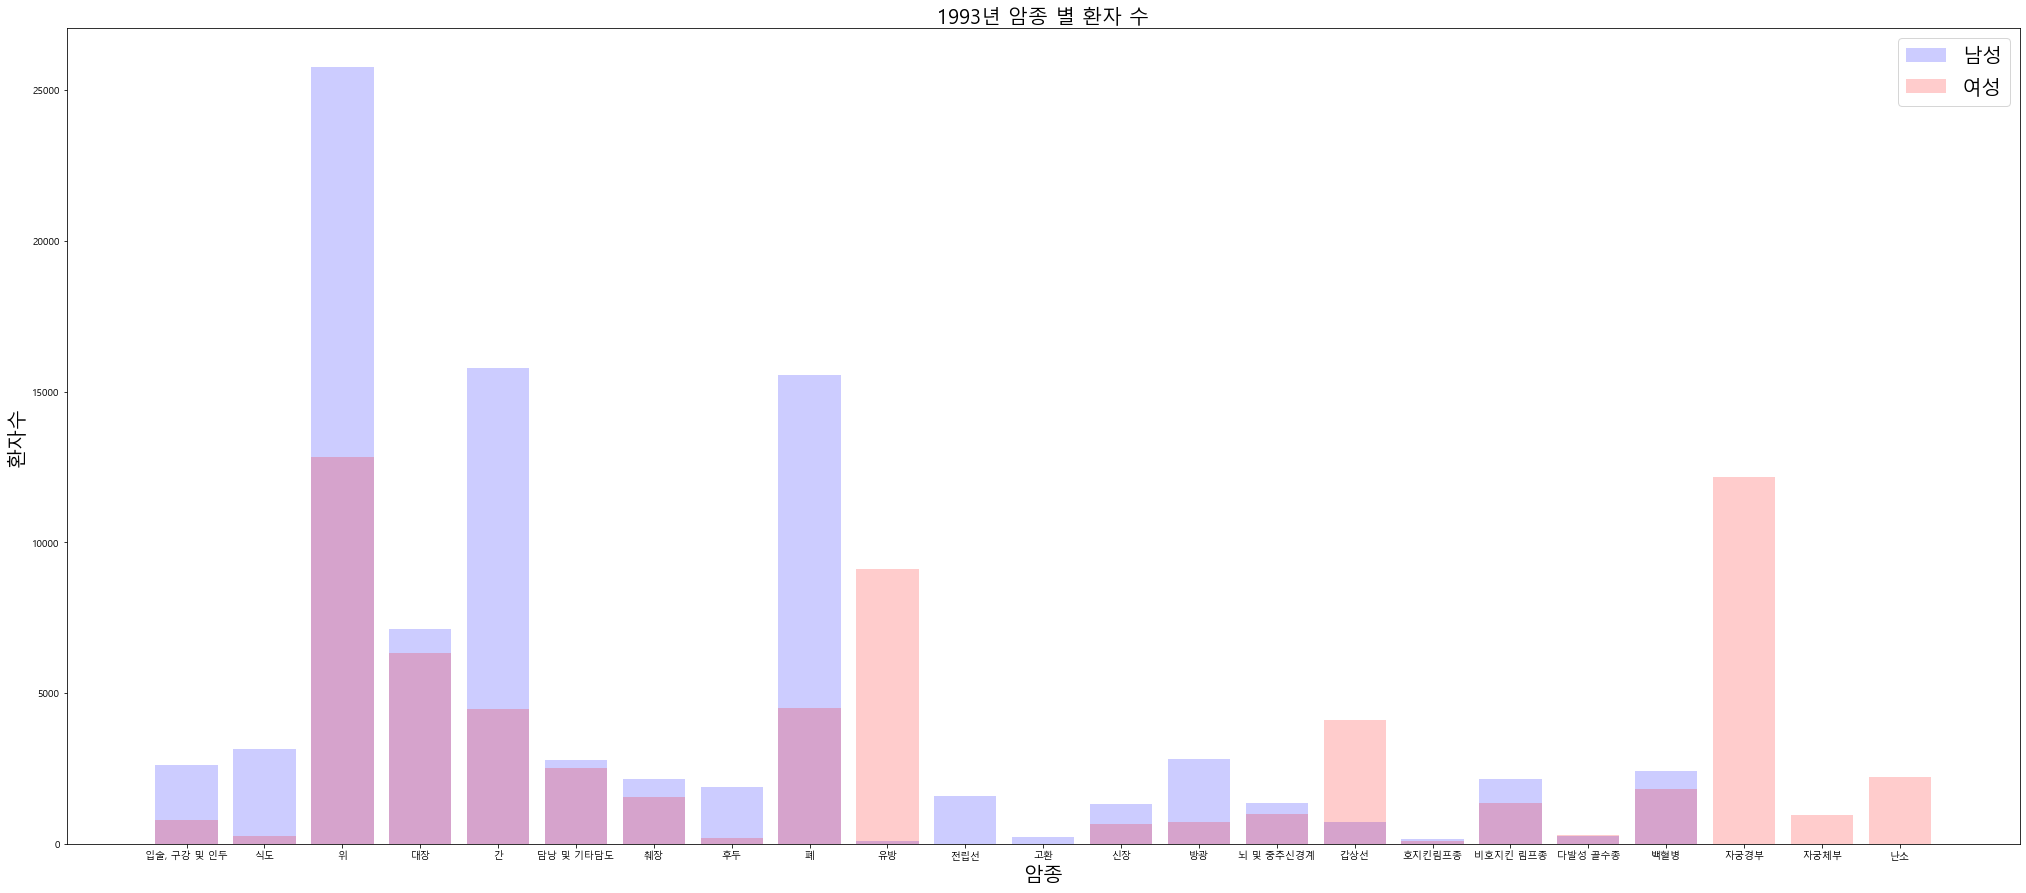

In [40]:
plt.figure(figsize=(35,15))
plt.bar(man1993['암종'], man1993['환자수'],  label='남성', color ='b',alpha=0.2 )
plt.bar(woman1993['암종'], woman1993['환자수'],  label= '여성', color ='r',alpha=0.2)
plt.title('1993년 암종 별 환자 수', fontsize=20)
plt.ylabel('환자수', fontsize=20)
plt.xlabel('암종', fontsize=20)
plt.legend(('남성', '여성'), fontsize=20)
plt.show()

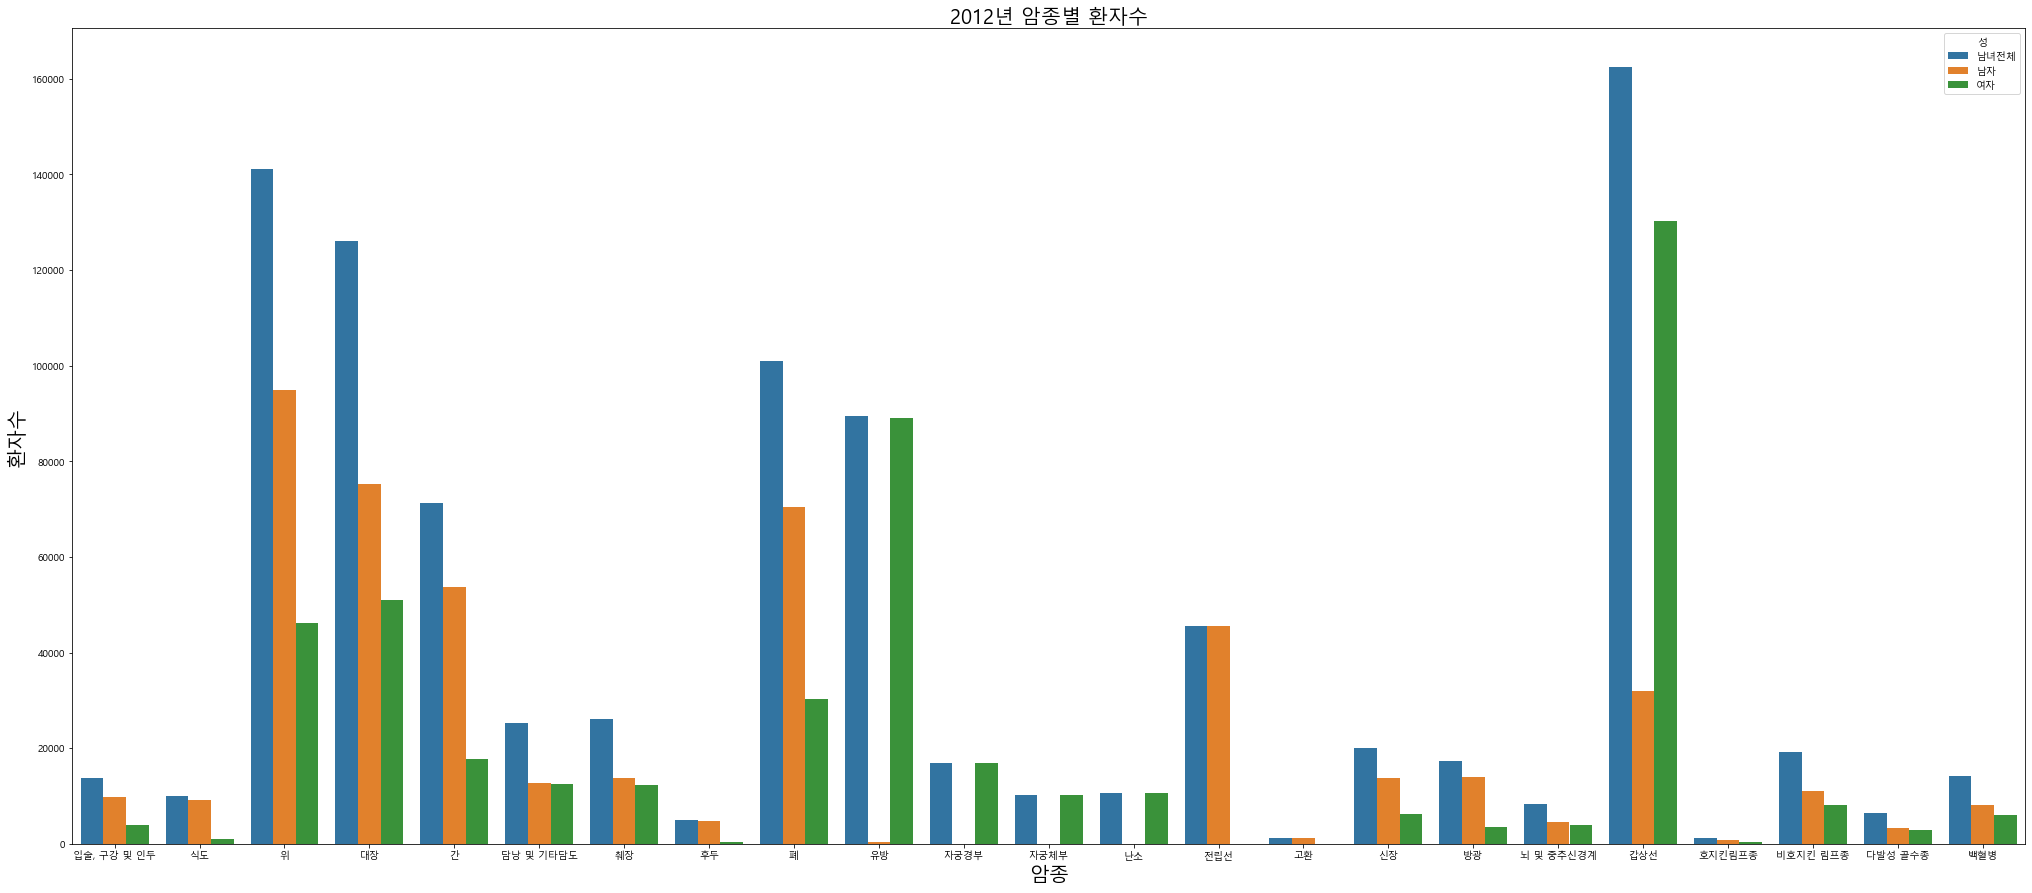

In [44]:
plt.subplots(figsize=(35, 15))
sns.barplot(data= cancer2012,x= "암종",y= "환자수", hue="성")
plt.ylabel('환자수', fontsize=20)
plt.xlabel('암종', fontsize=20)
plt.title("2012년 암종별 환자수",fontsize=20)
plt.show()
#seaborn으로 시각화

In [45]:
cancer1 = pd.read_csv('data/cancer1.csv', sep=",",encoding='cp949')

In [46]:
cancer1

,발생기간,성,국제질병분류코드(ICD-10),암종,환자수(명),5년 암상대생존율(%)
0,1993-1995년,남녀전체,C00-C96,모든암,169365,41.2
1,1993-1995년,남녀전체,C00-C14,"입술, 구강 및 인두",3400,41.1
2,1993-1995년,남녀전체,C15,식도,3412,12.7
3,1993-1995년,남녀전체,C16,위,38593,42.8
4,1993-1995년,남녀전체,C18-C20,대장,13467,54.8
...,...,...,...,...,...,...
415,2012-2016년,여자,C81,호지킨림프종,471,85.0
416,2012-2016년,여자,"C82-C86,C96",비호지킨 림프종,8101,63.0
417,2012-2016년,여자,C90,다발성 골수종,2976,43.6
418,2012-2016년,여자,C91-C95,백혈병,5974,51.1


In [47]:
cancer1.rename(columns={" 5년 암상대생존율(%)":"5년 암상대생존율"}, inplace=True)
cancer1.rename(columns={"환자수(명)":"환자수"}, inplace=True)

In [48]:
cancer1 = cancer1[cancer1['성']=='남녀전체']
#남녀전체로 보기 위함

In [49]:
new = cancer1[cancer1['암종']=='모든암']
new1 = cancer1[cancer1['암종']=='위']
new2 = cancer1[cancer1['암종']=='갑상선']
new3 = cancer1[cancer1['암종']=='대장']
new4 = cancer1[cancer1['암종']=='간']
new5 = cancer1[cancer1['암종']=='폐']
#모든 암종을 보았으나, 값의 차이가 많아 환자수가 많은 암종을 특정하였다.

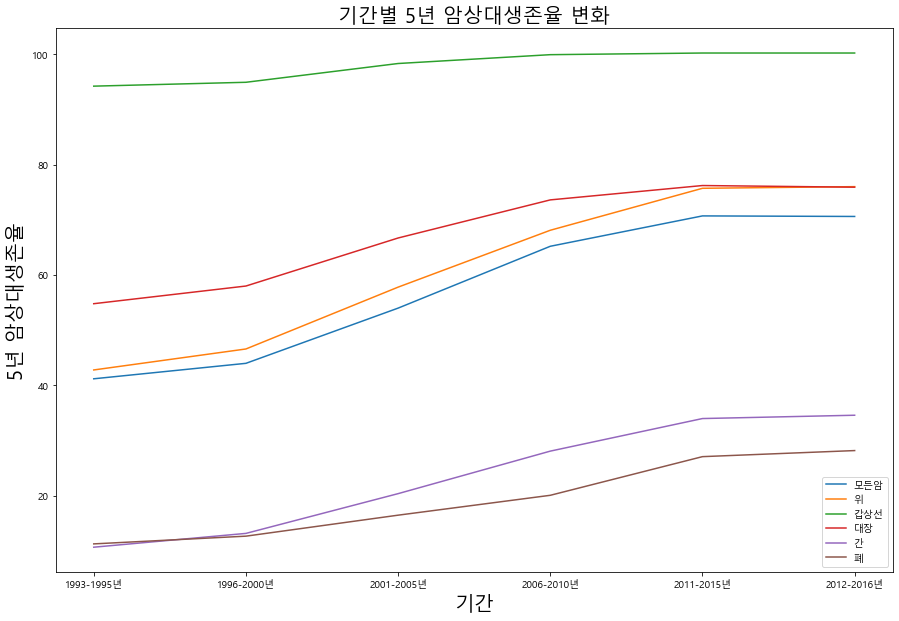

In [50]:
plt.figure(figsize=(15,10))
x = new['발생기간']
y = new['5년 암상대생존율']
y1 = new1['5년 암상대생존율']
y2 = new2['5년 암상대생존율']
y3 = new3['5년 암상대생존율']
y4 = new4['5년 암상대생존율']
y5 = new5['5년 암상대생존율']
plt.plot(x,y, label='모든암')
plt.plot(x,y1, label='위')
plt.plot(x,y2, label='갑상선')
plt.plot(x,y3, label='대장')
plt.plot(x,y4, label='간')
plt.plot(x,y5, label='폐')
plt.title('기간별 5년 암상대생존율 변화', fontsize=20)
plt.ylabel('5년 암상대생존율', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.legend()
plt.show()

In [51]:
cancer2 = pd.read_csv('data/cancer1.csv', sep=",",encoding='cp949')
cancer2.rename(columns={" 5년 암상대생존율(%)":"5년 암상대생존율"}, inplace=True)
cancer2.rename(columns={"환자수(명)":"환자수"}, inplace=True)
cancer2 = cancer2[cancer2['성']=='남녀전체']

In [52]:
cancer2['암종'].value_counts()
#암종류 확인

식도             6
위              6
신장             6
자궁체부           6
입술, 구강 및 인두    6
다발성 골수종        6
난소             6
고환             6
폐              6
대장             6
간              6
담낭 및 기타담도      6
갑상선            6
백혈병            6
호지킨림프종         6
모든암            6
방광             6
자궁경부           6
유방             6
비호지킨 림프종       6
후두             6
전립선            6
기타 암           6
췌장             6
뇌 및 중추신경계      6
Name: 암종, dtype: int64

In [53]:
am = cancer2[cancer2['암종']=='모든암']
am1 = cancer2[cancer2['암종']=='대장']
am2 = cancer2[cancer2['암종']=='간']
am3 = cancer2[cancer2['암종']=='폐']
am4 = cancer2[cancer2['암종']=='유방']
am5 = cancer2[cancer2['암종']=='전립선']
am6 = cancer2[cancer2['암종']=='갑상선']
#모든 암종을 보려고 하였으나, 변화가 미미한 암종은 제거하였다.

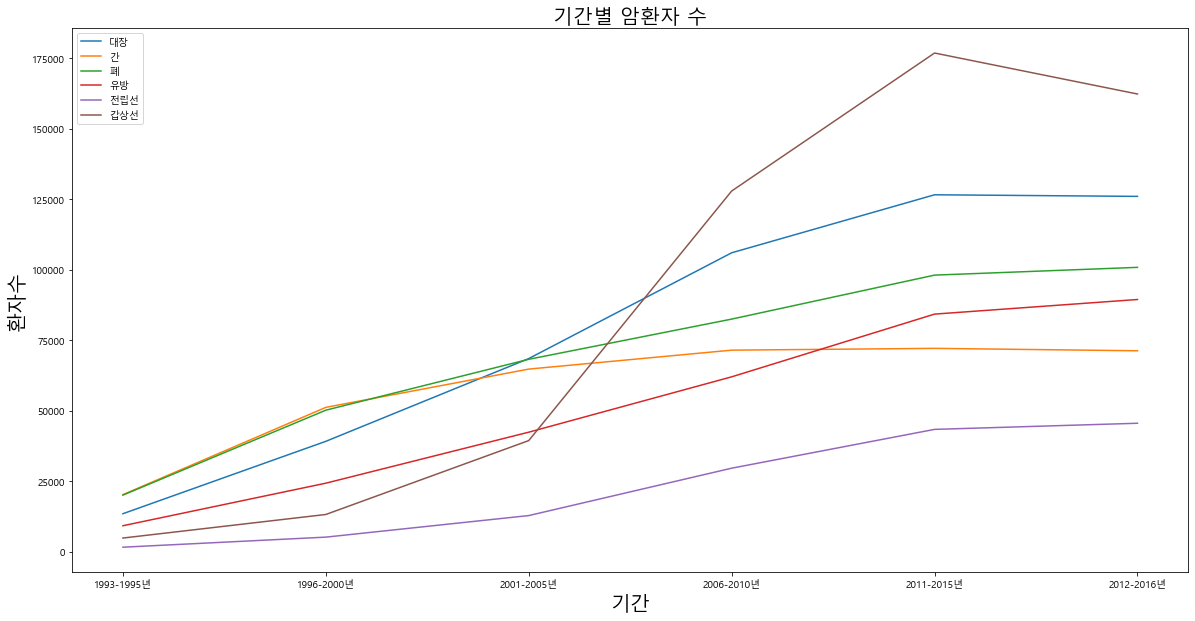

In [56]:
plt.figure(figsize=(20,10))
x = am['발생기간']
y1 = am1['환자수']
y2 = am2['환자수']
y3 = am3['환자수']
y4 = am4['환자수']
y5 = am5['환자수']
y6 = am6['환자수']
plt.plot(x,y1, label='대장')
plt.plot(x,y2, label='간')
plt.plot(x,y3, label='폐')
plt.plot(x,y4, label='유방')
plt.plot(x,y5, label='전립선')
plt.plot(x,y6, label='갑상선')

plt.title('기간별 암환자 수', fontsize=20)
plt.ylabel('환자수', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.legend()
plt.show()